About data:  
- movies  
[**movieId**, title, genres]
- tags  
[userId, movieId, tag, timestamp]
- ratings  
[userId, movieId, rating, timestamp]
- links  
[**movieId**, **imdbId**, tmdbId]



In [2]:
direcory = "ml-latest-small"

import pandas as pd 
import numpy as np
import random
import matplotlib.pyplot as plt

## Movies

In [13]:
movies = pd.read_csv('ml-latest-small/movies.csv')
movies.shape

(9742, 3)

In [14]:
movies.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [15]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
movieId    9742 non-null int64
title      9742 non-null object
genres     9742 non-null object
dtypes: int64(1), object(2)
memory usage: 228.4+ KB


In [16]:
for col in movies:
    print(col,movies[col].nunique())

movieId 9742
title 9737
genres 951


In [17]:
genres = movies["genres"].str.cat(sep="|")
unique_genres = list(set(genres.split("|")))
unique_genres

['Drama',
 'Film-Noir',
 'IMAX',
 'Fantasy',
 'Crime',
 '(no genres listed)',
 'Romance',
 'War',
 'Horror',
 'Animation',
 'Documentary',
 'Children',
 'Thriller',
 'Musical',
 'Sci-Fi',
 'Adventure',
 'Action',
 'Comedy',
 'Western',
 'Mystery']

In [18]:
movies["genres"].str.count("Romance").sum()

1596

In [19]:
len(list(unique_genres))

20

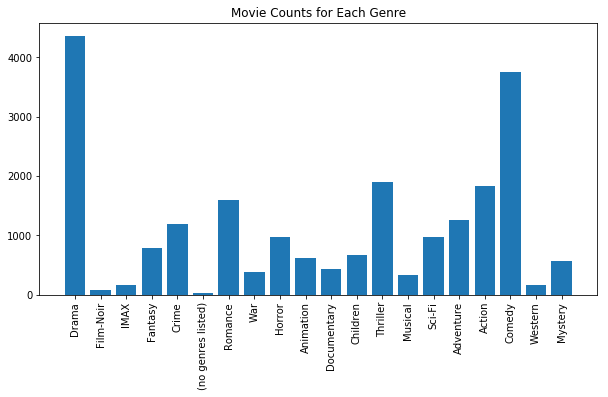

In [20]:
counts = []
for genre in unique_genres:
    counts.append(movies["genres"].str.count(genre).sum())

plt.figure(figsize = [10,5])
plt.title("Movie Counts for Each Genre")
plt.bar(unique_genres,counts)
plt.xticks(np.arange(len(unique_genres)), unique_genres,rotation=90)
plt.show()

In [21]:
movies["n_genre"] = movies["genres"].apply(lambda x: len(x.split("|")))
movies.head(5)

,movieId,title,genres,n_genre
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5
1,2,Jumanji (1995),Adventure|Children|Fantasy,3
2,3,Grumpier Old Men (1995),Comedy|Romance,2
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,3
4,5,Father of the Bride Part II (1995),Comedy,1


Average number of genres a movie has: 2.2668856497639087


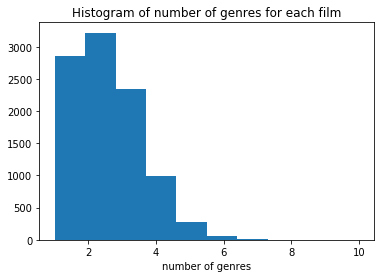

In [22]:
print("Average number of genres a movie has:",movies["n_genre"].mean())
plt.hist(movies["n_genre"])
plt.title("Histogram of number of genres for each film")
plt.xlabel("number of genres")
plt.show()

## Tags

In [27]:
tags = pd.read_csv('ml-latest-small/tags.csv')
tags.shape

(3683, 4)

In [28]:
tags.head(5)

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [29]:
for col in tags:
    print(col,tags[col].nunique())

userId 58
movieId 1572
tag 1589
timestamp 3411


#### How many tags does each movie has?

In [51]:
movie_tags_count = tags.groupby("movieId").count()[["tag"]]
print("Stats for number of tags for each moview:\n",movie_tags_count["tag"].describe())

movie_distinct_tags_count = tags.groupby("movieId")["tag"].nunique()
print("Stats for number of distinct tags for each movie:\n",movie_distinct_tags_count.describe())

Stats for number of tags for each moview:
 count    1572.000000
mean        2.342875
std         5.562342
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       181.000000
Name: tag, dtype: float64
Stats for number of distinct tags for each movie:
 count    1572.000000
mean        2.276718
std         5.242838
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       173.000000
Name: tag, dtype: float64


#### How many users interacted with (given tag to ) each movie?  
???

In [52]:
movie_distinct_users_count = tags.groupby("movieId")["userId"].nunique()
print("Stats for number of distinct users for each moview:\n",movie_distinct_users_count.describe())

Stats for number of distinct users for each moview:
 count    1572.000000
mean        1.129135
std         0.488431
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        10.000000
Name: userId, dtype: float64


#### How many movies does each user tag?

In [53]:

user_distinct_movies_count = tags.groupby("userId")["movieId"].nunique()
print("Stats for number of distinct movies for each user:\n",user_distinct_movies_count.describe())

Stats for number of distinct movies for each user:
 count      58.000000
mean       30.603448
std       162.230607
min         1.000000
25%         1.000000
50%         2.000000
75%         7.000000
max      1235.000000
Name: movieId, dtype: float64


#### How many tag does each user give?

In [54]:
user_distinct_tag_count = tags.groupby("userId")["tag"].nunique()
print("Stats for number of distinct tags for each user:\n",user_distinct_tag_count.describe())


Stats for number of distinct tags for each user:
 count     58.000000
mean      37.327586
std       98.237697
min        1.000000
25%        2.000000
50%        3.500000
75%       11.500000
max      595.000000
Name: tag, dtype: float64


## Ratings

In [85]:
ratings = pd.read_csv('ml-latest-small/ratings.csv')
ratings.shape

(100836, 4)

In [86]:
ratings.head(5)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [87]:
for col in ratings:
    print(col,ratings[col].nunique())

userId 610
movieId 9724
rating 10
timestamp 85043


### rating vs time

In [88]:
import time
import datetime
ratings['year'] = ratings['timestamp'].apply(lambda x: datetime.datetime.fromtimestamp(x).strftime('%Y'))
ratings.head()

,userId,movieId,rating,timestamp,year
0,1,1,4.0,964982703,2000
1,1,3,4.0,964981247,2000
2,1,6,4.0,964982224,2000
3,1,47,5.0,964983815,2000
4,1,50,5.0,964982931,2000


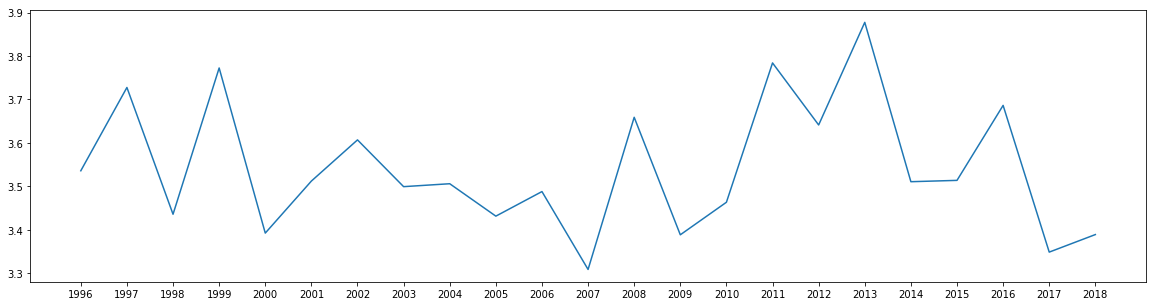

In [95]:
plt.figure(figsize=[20,5])
plt.plot(ratings.groupby('year').mean()["rating"])
plt.show()

### how many movies does each user rate?

In [58]:
user_distinct_movie_rated_count = ratings.groupby("userId")["movieId"].nunique()
print("Stats for number of distinct movies that a user rated:\n",user_distinct_movie_rated_count.describe())


Stats for number of distinct movies that a user rated:
 count     610.000000
mean      165.304918
std       269.480584
min        20.000000
25%        35.000000
50%        70.500000
75%       168.000000
max      2698.000000
Name: movieId, dtype: float64


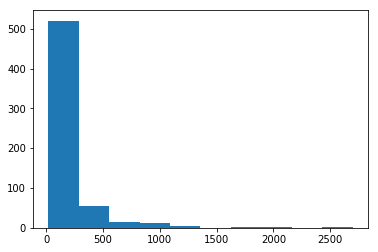

In [61]:
plt.hist(user_distinct_movie_rated_count)
plt.show()

In [62]:
movie_ratings = movies.merge(ratings, left_on="movieId",right_on="movieId",how="inner")
movie_ratings.head()

,movieId,title,genres,n_genre,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,17,4.5,1305696483


In [63]:
genres2 = movie_ratings["genres"].str.cat(sep="|")
unique_genres2 = set(genres.split("|"))
unique_genres2

{'(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

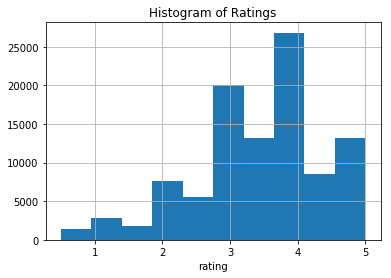

In [64]:
plt.hist(movie_ratings["rating"])
plt.xlabel("rating")
plt.title("Histogram of Ratings")
plt.grid()
plt.show()

In [65]:
movie_ratings["rating"].unique()

array([4. , 4.5, 2.5, 3.5, 3. , 5. , 0.5, 2. , 1.5, 1. ])

### rating distribution for each genre

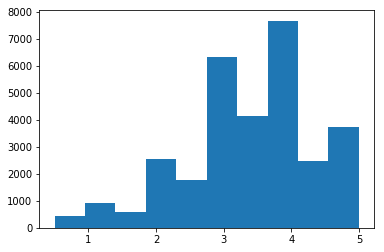

In [70]:
plt.hist(movie_ratings[movie_ratings["genres"].str.contains("Action")]["rating"])
plt.show()

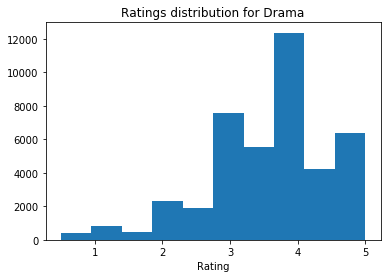

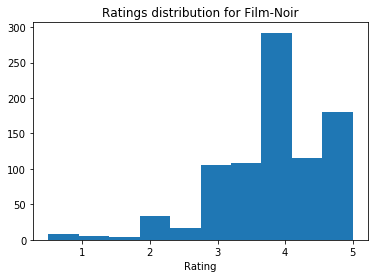

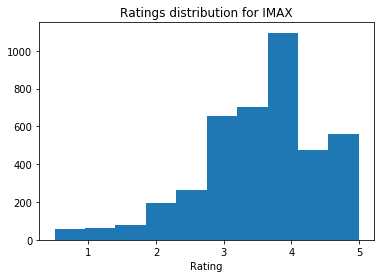

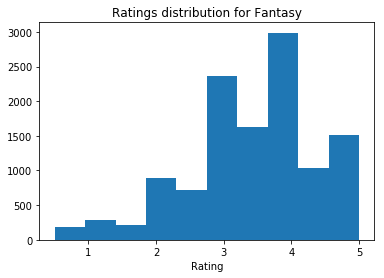

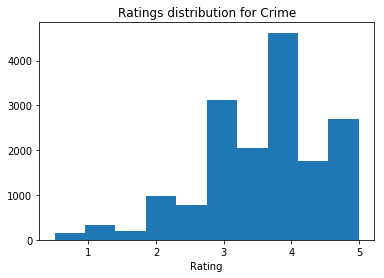

/Users/carold/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


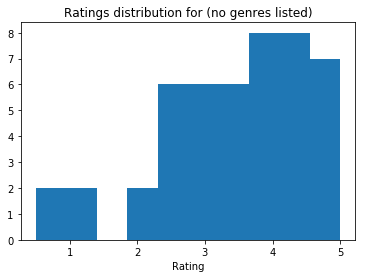

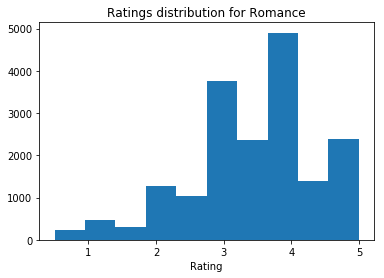

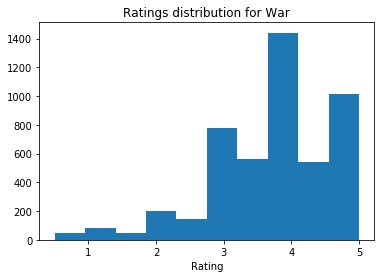

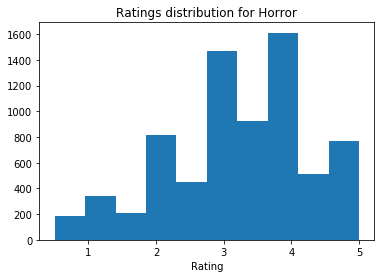

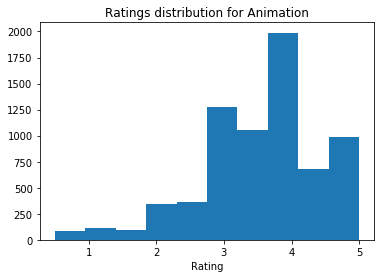

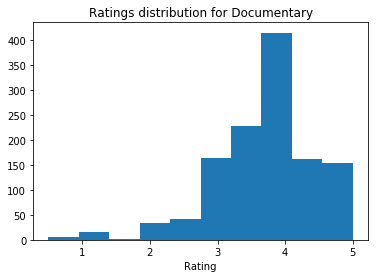

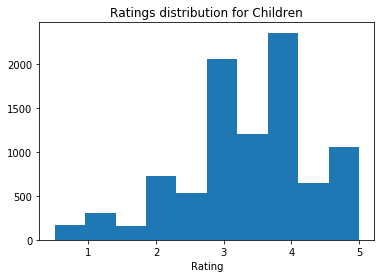

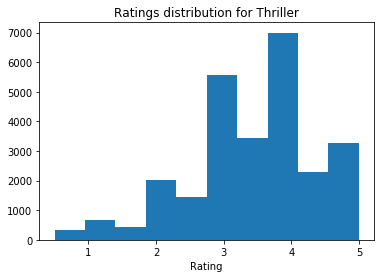

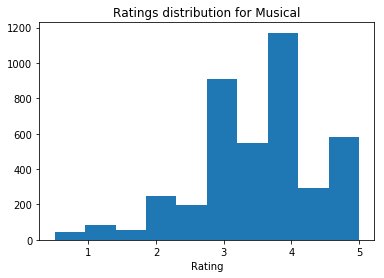

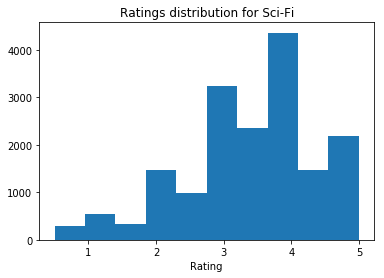

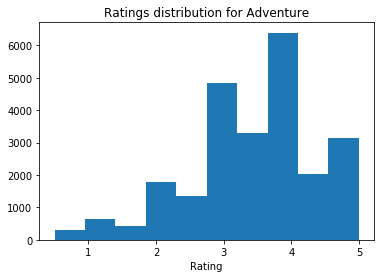

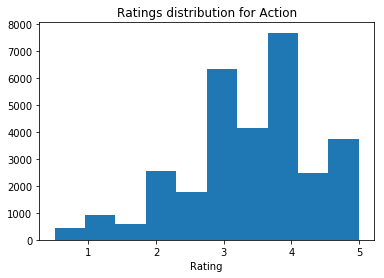

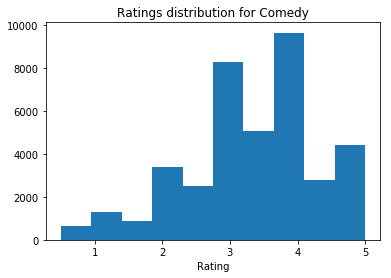

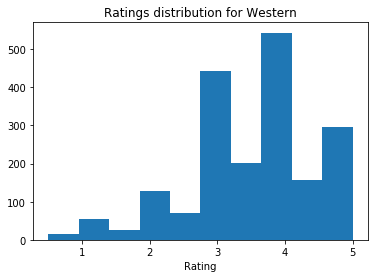

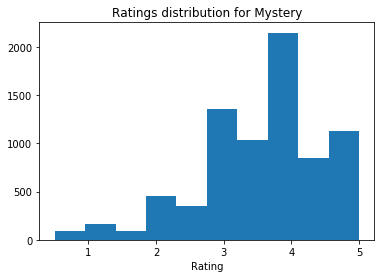

In [74]:
for genre in unique_genres2:
    plt.title("Ratings distribution for "+genre)
    plt.hist(movie_ratings[movie_ratings["genres"].str.contains(genre)]["rating"])
    plt.xlabel("Rating")
    plt.show()

## Links

In [16]:
links = pd.read_csv('ml-latest-small/links.csv')
links.shape

(9742, 3)

In [17]:
links.head(5)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [27]:
for col in links:
    print(col,links[col].nunique())

movieId 9742
imdbId 9742
tmdbId 9733
